## [t-test_ANOVA]
<br/>

- 2표본 문제에 관한 가설검정
    - 1차원 이산형 확률변수
    - Paired t-test
    - Independent t-test
    <br/><br/>

- 세 군 이상의 크기 비교
    - One way ANOVA
    <br/><br/>
    

- ###  Paired t-test (if 정규성 만족 x &rarr; 윌콕슨의 부호순위검정)
<br/>

문제 : 다음은 새로운 항우울제의 치료 효과를 증명하기 위한 연구이다. 총 26명의 우울증 환자를 대상으로 항우울제 치료 전/후(Pre/Post)의 우울증 점수를 측정하였다. 치료 전과 비교하여 새 항우울제 치료 후 우울증 점수가 유의하게 감소하였는지를 검정하라. (정규성은 만족한다고 가정)

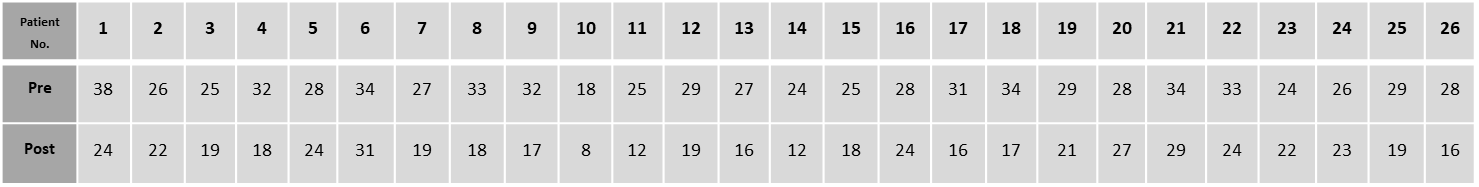

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(111)

depression = pd.read_csv('C:/Users/User/Jupyter/statistical_analysis/data/ch11_depression.csv')
print(depression.shape)

depression.head()

(26, 2)


,Pre,Post
0,38,24
1,26,22
2,25,19
3,32,18
4,28,24


In [9]:
# 방법(1)

depression['Diff'] = depression['Pre'] - depression['Post']
depression.head()

t, p = stats.ttest_1samp(depression['Diff'], 0)
p_val1 = p/2
print(p_val1)

3.1636311371318185e-10


In [10]:
# 방법(2)

t, p = stats.ttest_rel(depression['Pre'], depression['Post'])
p_val2 = p/2
print(p_val2)

3.1636311371318185e-10


- ###  independent t-test (if 정규성 만족 x &rarr; 만ㆍ위트니의 U 검정)
<br/>

문제 : 새로운 항우울제의 치료 효과를 증명하기 위해 40명의 우울증 환자를 군당 20명씩 실험군과 대조군으로 무작위 배정하여 실험군에게는 항우울제를, 대조군에게는 위약(가짜 약)을 투여하였다. 1개월의 치료 뒤 측정한 우울증 점수를 통해 두 군의 치료 효과의 크기를 비교하고자 한다. 두 군 사이에 우울증 점수의 차이가 있는지 검정하라. (독립성, 정규성, 등분산성은 만족한다고 가정)

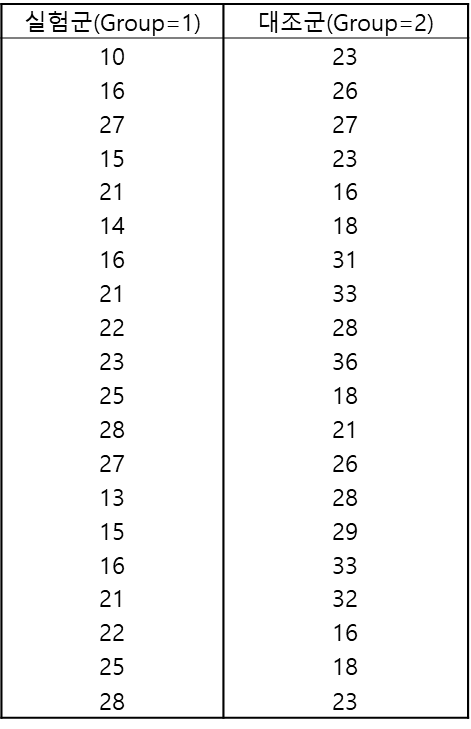

In [11]:
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(111)

depression = pd.read_csv('C:/Users/User/Jupyter/statistical_analysis/data/ch11_depression_independent.csv')
print(depression.shape)

depression.head()

(20, 2)


,실험군,대조군
0,10,23
1,16,26
2,27,27
3,15,23
4,21,16


In [13]:
t, p = stats.ttest_ind(depression['실험군'], depression['대조군'], equal_var=False) # equal_var=False : 웰치의 방법을 사용하여 p값을 구하겠다는 의미

print(t, p)

-2.7163653614156966 0.009917052054566907


- ###  일원배치 분산분석(one way analysis of variance, one way ANOVA)
<br/>
: 연속형 변수로 측정된 세 군 이상의 크기를 비교하기 위해 흔히 사용되는 통계분석 방법

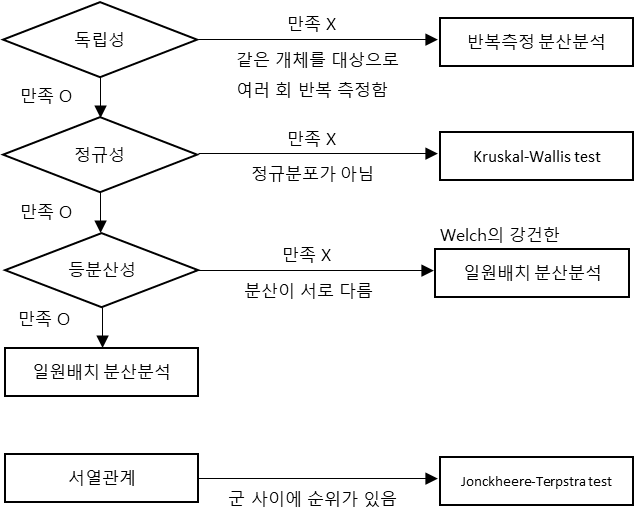

문제 : 다음은 서로 다른 항우울제의 치료 효과를 비교하기 위한 연구이다. 36명의 우울증 환자를 A 집단, B 집단, C 집단으로 12명씩 무작위 배정하여 각각 A 약, B 약, C 약을 2개월 동안 투여한 뒤 우울증 점수를 측정하였다. 이 세가지 약의 치료 효과를 비교하라.(단 독립성, 정규성, 등분산성은 만족한다고 가정한다.)

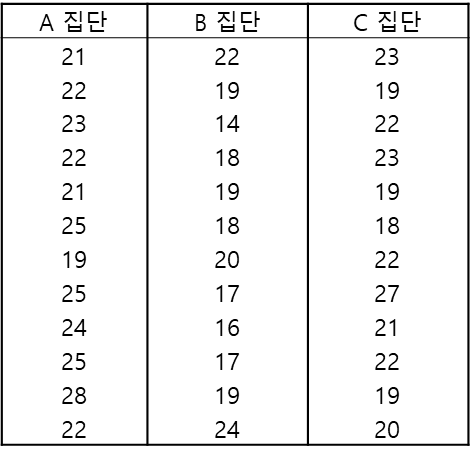

In [17]:
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(14)

depression_ANOVA = pd.read_csv('C:/Users/User/Jupyter/statistical_analysis/data/ch11_depression_ANOVA.csv')
print(depression_ANOVA.shape)
depression_ANOVA.head()

(12, 3)


,A,B,C
0,21,22,23
1,22,19,19
2,23,14,22
3,22,18,23
4,21,19,19


In [20]:
# F검정

F, p = stats.f_oneway(depression_ANOVA['A'], depression_ANOVA['B'], depression_ANOVA['C'])
print('ANOVA 결과 : F={0:.1f}, p={1:.5f}'.format(F, p))

if p < 0.05:
    print('p-value가 충분히 작기 때문에 그룹 평균값이 통계적으로 유의하게 차이납니다.')

ANOVA 결과 : F=9.7, p=0.00050
p-value가 충분히 작기 때문에 그룹 평균값이 통계적으로 유의하게 차이납니다.


In [29]:
# 사후분석에 필요한 DataFrame 만들기

all_data = []
all_data.extend(depression_ANOVA['A'])
all_data.extend(depression_ANOVA['B'])
all_data.extend(depression_ANOVA['C'])

all_data_group = []

for i in range(12):
    all_data_group.append('A')
for j in range(12):
    all_data_group.append('B')
for k in range(12):
    all_data_group.append('C')
    
df = pd.DataFrame({'score':all_data, 'group':all_data_group})
df.head()

,score,group
0,21,A
1,22,A
2,23,A
3,22,A
4,21,A


In [33]:
# 사후분석

from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

comp = MultiComparison(df.score, df.group)
hsd = pairwise_tukeyhsd(df['score'], df['group'], alpha=0.05)
hsd.summary()

# reject=True면 귀무가설 기각. 즉, 평균의 차이가 있다.

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-4.5,0.001,-7.0271,-1.9729,True
A,C,-1.8333,0.192,-4.3604,0.6938,False
B,C,2.6667,0.0369,0.1396,5.1938,True
